In [3]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns

In [30]:
df = pd.read_csv("../results/procesed_data.csv")
df.head(5)

,sequence,label,mw,charge_density,hydrophobic_ratio,boman_index,isoelectric_point,instability_index
0,QEDCELCINVACTGC,0,1599.84,-0.00142,0.53333,1.02267,3.68750,80.38000
1,MAATTTATSLFSSRLHFQNQNQGYGFPAKTPNSLQVNQIIDGRKMR...,0,5854.58,0.00087,0.37037,1.77722,11.88379,28.67963
2,SKGKKANKDVELARG,1,1599.84,0.00250,0.26667,3.21533,11.10547,8.14000
3,ADLEVVAATYVLVA,1,1432.67,-0.00070,0.71429,-1.07143,3.92969,3.22143
4,MAESPSESTSDSLSTTTSTKPAQSGTVSISSPQSHHVVFPEIPIEIVS,0,4971.40,-0.00056,0.27083,1.47667,4.64307,100.18333


In [31]:
df["length"] = df["sequence"].str.len()

In [32]:
if "sequence" in df.columns:
    df = df.drop(columns=["sequence"])
else:
    print("La columna ya no existe")

In [34]:
df

,label,mw,charge_density,hydrophobic_ratio,boman_index,isoelectric_point,instability_index,length
0,0,1599.84,-0.00142,0.53333,1.02267,3.68750,80.38000,15
1,0,5854.58,0.00087,0.37037,1.77722,11.88379,28.67963,54
2,1,1599.84,0.00250,0.26667,3.21533,11.10547,8.14000,15
3,1,1432.67,-0.00070,0.71429,-1.07143,3.92969,3.22143,14
4,0,4971.40,-0.00056,0.27083,1.47667,4.64307,100.18333,48
...,...,...,...,...,...,...,...,...
21215,1,5109.73,-0.00076,0.39583,0.88271,4.30786,28.15417,48
21216,1,3794.47,0.00134,0.44118,1.29471,11.51904,36.05588,34
21217,0,2823.28,-0.00121,0.57692,0.44769,3.32178,72.76154,26
21218,0,2991.63,0.00064,0.53571,-0.84643,9.75977,89.00000,28


In [35]:
df["length"].describe()

count    21220.000000
mean        34.128322
std         22.773430
min         11.000000
25%         16.000000
50%         25.000000
75%         46.000000
max        100.000000
Name: length, dtype: float64

In [36]:
df = df[df["length"]<=50]

In [37]:
df.shape

(16794, 8)

In [38]:
df_label0 = df[df["label"] == 0].describe()
df_label1 = df[df["label"] == 1].describe()

In [39]:
df_label0

,label,mw,charge_density,hydrophobic_ratio,boman_index,isoelectric_point,instability_index,length
count,8425.0,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,0.0,2760.250932,0.000797,0.411718,1.396100,9.546913,48.222949,24.890920
std,0.0,1173.445910,0.001146,0.148884,1.627126,3.054186,36.750082,10.626006
min,0.0,915.910000,-0.005520,0.000000,-3.379500,2.451660,-66.025000,11.000000
25%,0.0,1781.310000,0.000030,0.318180,0.416000,7.314450,23.809520,15.000000
50%,0.0,2446.000000,0.000820,0.400000,1.473000,10.111820,43.868970,22.000000
75%,0.0,3543.160000,0.001500,0.500000,2.328610,12.115230,66.130770,32.000000
max,0.0,6783.110000,0.006200,0.894740,10.992220,14.244140,406.169230,50.000000


In [40]:
df_label1

,label,mw,charge_density,hydrophobic_ratio,boman_index,isoelectric_point,instability_index,length
count,8369.0,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000
mean,1.0,2636.302279,0.001746,0.403994,1.434913,10.698677,38.190361,23.090453
std,0.0,1156.744159,0.001442,0.140808,1.783367,2.718361,44.304770,10.520742
min,1.0,836.910000,-0.003340,0.000000,-3.861180,2.476070,-73.339580,11.000000
25%,1.0,1740.220000,0.000720,0.318180,0.209090,9.524410,9.411760,15.000000
50%,1.0,2266.630000,0.001650,0.406250,1.262170,11.156740,30.822730,20.000000
75%,1.0,3210.700000,0.002800,0.500000,2.493180,13.000000,56.556250,29.000000
max,1.0,6522.960000,0.006860,1.000000,12.045000,14.329100,454.955560,50.000000


In [41]:
colors = {0:"#e63946", 
          2: "#a8dadc",
          1: "#457b9d"
          }

<Axes: xlabel='mw'>

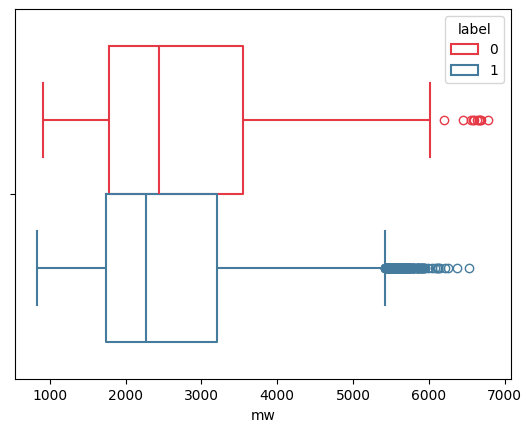

In [42]:
sns.boxplot(
    data=df,
    x="mw",
    hue="label",
    fill=False,
    palette=colors
)

<Axes: xlabel='charge_density'>

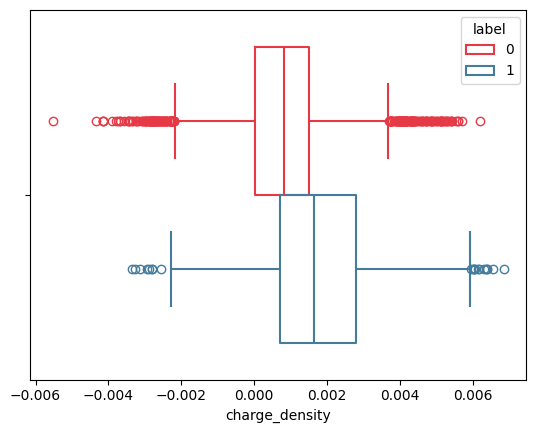

In [44]:
sns.boxplot(
    data=df,
    x="charge_density",
    hue="label",
    fill=False,
    palette=colors
)

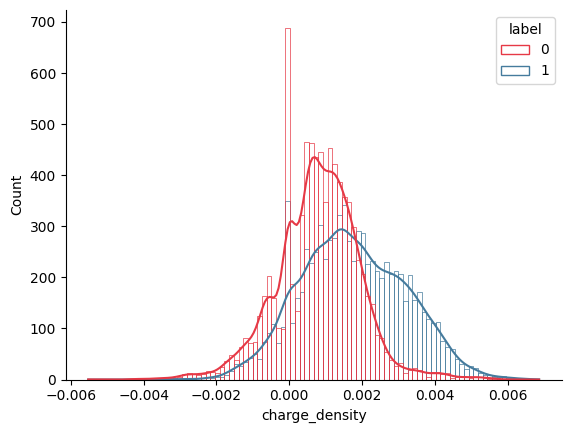

In [45]:
sns.histplot(
    data=df,
    palette=colors,
    x="charge_density",
    hue="label",
    fill=False,
    kde=True
)
sns.despine()

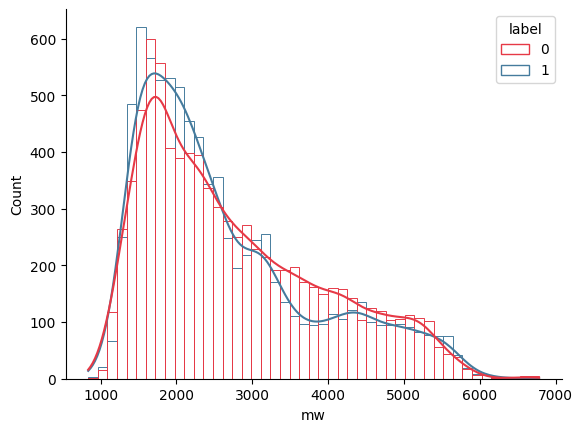

In [43]:
sns.histplot(
    data=df,
    palette=colors,
    x="mw",
    hue="label",
    fill=False,
    kde=True
)
sns.despine()

In [47]:
corr_global = df.drop(columns=["label"]).corr(method="pearson")

In [48]:
corr_label1 = df_label1.drop(columns=["label"]).corr(method="pearson")
corr_label0 = df_label0.drop(columns=["label"]).corr(method="pearson")

<Axes: >

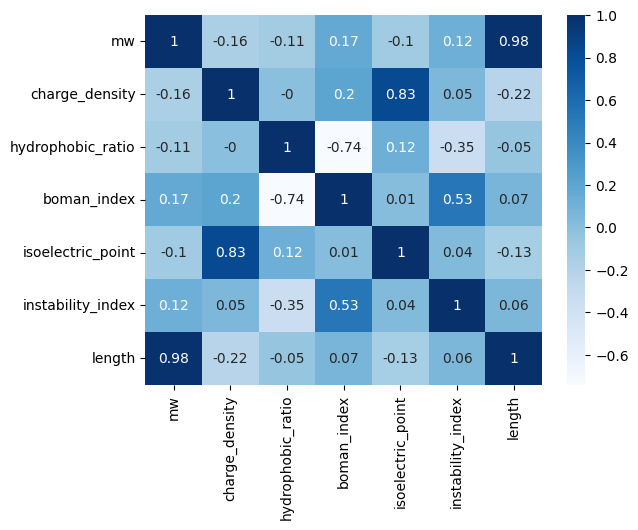

In [55]:
sns.heatmap(data=corr_global.round(decimals=2), cmap="Blues", annot=True)

<Axes: >

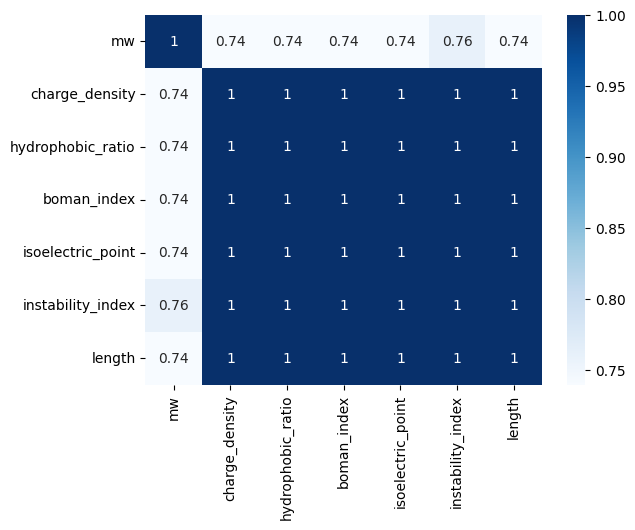

In [56]:
sns.heatmap(data=corr_label0.round(decimals=2), cmap="Blues", annot=True)

<Axes: >

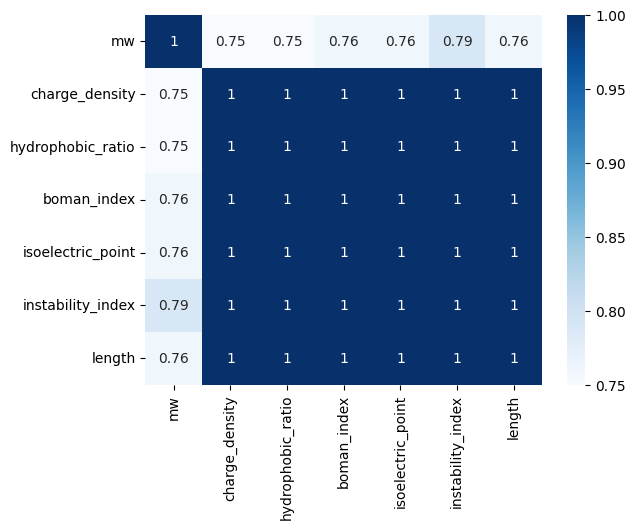

In [57]:
sns.heatmap(data=corr_label1.round(decimals=2), cmap="Blues", annot=True)